In [13]:
import tensorflow as tf
import numpy as np
#import pandas as pd
import cv2

print("TensorFlow Version:", tf.__version__)
print("NumPy Version:", np.__version__)

print("OpenCV Version:", cv2.__version__)


TensorFlow Version: 2.18.0
NumPy Version: 2.0.2
OpenCV Version: 4.11.0


In [5]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [ ]:
import cv2
import os
import time

# Define paths
dataset_path = r"C:\Users\Akshaya\Downloads\fake\archive"
output_folder = r"C:\Users\Akshaya\Downloads\fake\frames"
os.makedirs(output_folder, exist_ok=True)

# Categories for real and fake videos
categories = {
    "DFD_original_sequences": "real",
    "DFD_manipulated_sequences": "fake1"  # Changed to fake1
}

# Count total videos for progress tracking
total_videos = sum(
    len(os.listdir(os.path.join(dataset_path, folder))) for folder in categories if os.path.exists(os.path.join(dataset_path, folder))
)
video_count = 0
start_time = time.time()

for folder, label in categories.items():
    video_folder = os.path.join(dataset_path, folder)
    frame_output_folder = os.path.join(output_folder, label)  # Saves frames in "real" or "fake1"
    os.makedirs(frame_output_folder, exist_ok=True)

    if not os.path.exists(video_folder):
        print(f"⚠️ Warning: Folder not found - {video_folder}")
        continue  # Skip if folder doesn't exist

    for video_file in os.listdir(video_folder):
        if not video_file.endswith(('.mp4', '.avi', '.mov', '.mkv')):  
            continue  # Skip non-video files
        
        video_path = os.path.join(video_folder, video_file)
        cap = cv2.VideoCapture(video_path)

        if not cap.isOpened():
            print(f"⚠️ Could not open video: {video_path}")
            continue

        video_count += 1
        frame_count = 0
        extracted_frames = 0  # Track extracted frames count
        print(f"\n📽 Processing Video {video_count}/{total_videos}: {video_file} ({label})")

        while True:
            ret, frame = cap.read()
            if not ret:
                break  # Exit loop if no frame is read

            if frame_count % 10 == 0:  # Save every 10th frame
                frame_filename = f"{video_file}_frame{frame_count}.jpg"
                frame_path = os.path.join(frame_output_folder, frame_filename)
                cv2.imwrite(frame_path, frame)
                extracted_frames += 1

            frame_count += 1
            if frame_count % 100 == 0:
                print(f"   ➡️ Extracted {extracted_frames} frames so far...")

        cap.release()
        
        # Estimate remaining time
        elapsed_time = time.time() - start_time
        avg_time_per_video = elapsed_time / video_count
        remaining_videos = total_videos - video_count
        estimated_remaining_time = avg_time_per_video * remaining_videos
        print(f"✅ Finished extracting {extracted_frames} frames from {video_file} ({label})")
        print(f"⏳ Estimated time left: {int(estimated_remaining_time // 60)} min {int(estimated_remaining_time % 60)} sec")

print("\n🎉 Frame extraction completed!")



📽 Processing Video 1/365: 01__exit_phone_room.mp4 (real)
   ➡️ Extracted 10 frames so far...
   ➡️ Extracted 20 frames so far...
   ➡️ Extracted 30 frames so far...
✅ Finished extracting 31 frames from 01__exit_phone_room.mp4 (real)
⏳ Estimated time left: 24 min 57 sec

📽 Processing Video 2/365: 01__hugging_happy.mp4 (real)
   ➡️ Extracted 10 frames so far...
   ➡️ Extracted 20 frames so far...
   ➡️ Extracted 30 frames so far...
   ➡️ Extracted 40 frames so far...
   ➡️ Extracted 50 frames so far...
   ➡️ Extracted 60 frames so far...
   ➡️ Extracted 70 frames so far...
✅ Finished extracting 79 frames from 01__hugging_happy.mp4 (real)
⏳ Estimated time left: 55 min 14 sec

📽 Processing Video 3/365: 01__kitchen_pan.mp4 (real)
   ➡️ Extracted 10 frames so far...
   ➡️ Extracted 20 frames so far...
   ➡️ Extracted 30 frames so far...
   ➡️ Extracted 40 frames so far...
   ➡️ Extracted 50 frames so far...
✅ Finished extracting 56 frames from 01__kitchen_pan.mp4 (real)
⏳ Estimated time lef

In [ ]:
import cv2
import os
import time

# Define paths
dataset_path = r"C:\Users\Akshaya\Downloads\fake\archive"
output_folder = r"C:\Users\Akshaya\Downloads\fake\frames"
os.makedirs(output_folder, exist_ok=True)

# Categories for real and fake videos
categories = {
    "DFD_original_sequences": "real",
    "DFD_manipulated_sequences": "fake"
}

# Count total videos for progress tracking
total_videos = sum(
    len(os.listdir(os.path.join(dataset_path, folder))) for folder in categories if os.path.exists(os.path.join(dataset_path, folder))
)
video_count = 0
start_time = time.time()

for folder, label in categories.items():
    video_folder = os.path.join(dataset_path, folder)
    frame_output_folder = os.path.join(output_folder, label)  # Saves frames in "real" or "fake"
    os.makedirs(frame_output_folder, exist_ok=True)

    if not os.path.exists(video_folder):
        print(f"⚠️ Warning: Folder not found - {video_folder}")
        continue  # Skip if folder doesn't exist

    for video_file in os.listdir(video_folder):
        if not video_file.endswith(('.mp4', '.avi', '.mov', '.mkv')):  
            continue  # Skip non-video files
        
        # Check if the video has already been processed
        existing_frames = [f for f in os.listdir(frame_output_folder) if f.startswith(video_file)]
        if existing_frames:
            print(f"⏩ Skipping already processed video: {video_file}")
            continue  # Skip this video
        
        video_path = os.path.join(video_folder, video_file)
        cap = cv2.VideoCapture(video_path)

        if not cap.isOpened():
            print(f"⚠️ Could not open video: {video_path}")
            continue

        video_count += 1
        frame_count = 0
        extracted_frames = 0  # Track extracted frames count
        print(f"\n📽 Processing Video {video_count}/{total_videos}: {video_file} ({label})")

        try:
            while True:
                ret, frame = cap.read()
                if not ret:
                    break  # Exit loop if no frame is read

                if frame_count % 10 == 0:  # Save every 10th frame
                    frame_filename = f"{video_file}_frame{frame_count}.jpg"
                    frame_path = os.path.join(frame_output_folder, frame_filename)
                    cv2.imwrite(frame_path, frame)
                    extracted_frames += 1

                frame_count += 1
                if frame_count % 100 == 0:
                    print(f"   ➡️ Extracted {extracted_frames} frames so far...")

        except KeyboardInterrupt:
            print("\n⏹️ Process interrupted. Exiting safely...")
            cap.release()
            exit(0)  # Exit safely if Ctrl+C is pressed

        cap.release()
        
        # Estimate remaining time
        elapsed_time = time.time() - start_time
        avg_time_per_video = elapsed_time / video_count
        remaining_videos = total_videos - video_count
        estimated_remaining_time = avg_time_per_video * remaining_videos
        print(f"✅ Finished extracting {extracted_frames} frames from {video_file} ({label})")
        print(f"⏳ Estimated time left: {int(estimated_remaining_time // 60)} min {int(estimated_remaining_time % 60)} sec")

print("\n🎉 Frame extraction completed!")


⏩ Skipping already processed video: 01__exit_phone_room.mp4
⏩ Skipping already processed video: 01__hugging_happy.mp4
⏩ Skipping already processed video: 01__kitchen_pan.mp4
⏩ Skipping already processed video: 01__kitchen_still.mp4
⏩ Skipping already processed video: 01__meeting_serious.mp4
⏩ Skipping already processed video: 01__outside_talking_pan_laughing.mp4
⏩ Skipping already processed video: 01__outside_talking_still_laughing.mp4
⏩ Skipping already processed video: 01__podium_speech_happy.mp4
⏩ Skipping already processed video: 01__secret_conversation.mp4
⏩ Skipping already processed video: 01__talking_against_wall.mp4
⏩ Skipping already processed video: 01__talking_angry_couch.mp4
⏩ Skipping already processed video: 01__walking_and_outside_surprised.mp4
⏩ Skipping already processed video: 01__walking_down_indoor_hall_disgust.mp4
⏩ Skipping already processed video: 01__walking_down_street_outside_angry.mp4
⏩ Skipping already processed video: 01__walking_outside_cafe_disgusted.mp4


KeyboardInterrupt



: 

In [8]:
import cv2
import os
import time

# Set paths
video_folder = r"C:\Users\Akshaya\Downloads\fake\archive\DFD_original_sequences"
frame_output_folder = r"C:\Users\Akshaya\Downloads\fake\frames\real"
os.makedirs(frame_output_folder, exist_ok=True)

frame_interval = 30
video_list = []

# Recursively find video files
for root, dirs, files in os.walk(video_folder):
    for file in files:
        if file.endswith(('.mp4', '.avi', '.mov', '.mkv')):
            video_list.append(os.path.join(root, file))

total_videos = len(video_list)
start_time = time.time()
video_count = 0
processed_videos = 0

print(f"🔍 Starting extraction from {total_videos} real videos...\n")

for video_path in video_list:
    video_file = os.path.basename(video_path)

    # Skip if already processed
    if any(fname.startswith(video_file) for fname in os.listdir(frame_output_folder)):
        print(f"⏩ Skipping already processed video: {video_file}")
        continue

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"❌ Cannot open: {video_file}")
        continue

    frame_count = 0
    saved_frames = 0
    video_count += 1
    print(f"\n🎬 ({video_count}/{total_videos}) {video_file} [real]")

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % frame_interval == 0:
            frame_name = f"{video_file}_frame{frame_count}.jpg"
            frame_path = os.path.join(frame_output_folder, frame_name)
            cv2.imwrite(frame_path, frame)
            saved_frames += 1

        frame_count += 1

    cap.release()
    processed_videos += 1

    elapsed = time.time() - start_time
    time_per_video = elapsed / processed_videos if processed_videos > 0 else 0
    time_left = (total_videos - video_count) * time_per_video

    print(f"✅ Saved {saved_frames} frames")
    print(f"⏳ Elapsed: {int(elapsed // 60)}m {int(elapsed % 60)}s")
    print(f"⏳ Estimated time left: {int(time_left // 60)} min {int(time_left % 60)} sec")

print(f"\n🎉 Done extracting frames from real videos.")
print(f"✅ Total real videos processed: {processed_videos}/{total_videos}")


🔍 Starting extraction from 363 real videos...

⏩ Skipping already processed video: 01__exit_phone_room.mp4
⏩ Skipping already processed video: 01__hugging_happy.mp4
⏩ Skipping already processed video: 01__kitchen_pan.mp4
⏩ Skipping already processed video: 01__kitchen_still.mp4
⏩ Skipping already processed video: 01__meeting_serious.mp4
⏩ Skipping already processed video: 01__outside_talking_pan_laughing.mp4
⏩ Skipping already processed video: 01__outside_talking_still_laughing.mp4
⏩ Skipping already processed video: 01__podium_speech_happy.mp4
⏩ Skipping already processed video: 01__secret_conversation.mp4
⏩ Skipping already processed video: 01__talking_against_wall.mp4
⏩ Skipping already processed video: 01__talking_angry_couch.mp4
⏩ Skipping already processed video: 01__walking_and_outside_surprised.mp4
⏩ Skipping already processed video: 01__walking_down_indoor_hall_disgust.mp4
⏩ Skipping already processed video: 01__walking_down_street_outside_angry.mp4
⏩ Skipping already processe

In [11]:
import os

# Set your extracted frames folder path
frame_output_folder = r"C:\Users\Akshaya\Downloads\fake\frames\real"

# Get all filenames in the folder
all_files = os.listdir(frame_output_folder)

# Extract unique video filenames by splitting before '_frame'
unique_videos = set()
for file in all_files:
    if '_frame' in file:
        video_name = file.split('_frame')[0]
        unique_videos.add(video_name)

print(f"📸 Total extracted frames: {len(all_files)}")
print(f"🎬 Unique videos with extracted frames: {len(unique_videos)}")


📸 Total extracted frames: 30425
🎬 Unique videos with extracted frames: 363


In [ ]:
import cv2
import os
import time

# Update paths
video_folder = r"C:\Users\Akshaya\Downloads\fake\archive\DFD_manipulated_sequences"
frame_output_folder = r"C:\Users\Akshaya\Downloads\fake\frames\fake1"
os.makedirs(frame_output_folder, exist_ok=True)

frame_interval = 30
video_list = []

# Recursively find video files in all subfolders
for root, dirs, files in os.walk(video_folder):
    for file in files:
        if file.endswith(('.mp4', '.avi', '.mov', '.mkv')):
            video_list.append(os.path.join(root, file))

total_videos = len(video_list)
start_time = time.time()
video_count = 0

print(f"🔍 Starting extraction from {total_videos} manipulated videos...")

for video_path in video_list:
    video_file = os.path.basename(video_path)

    # Skip already processed
    if any(fname.startswith(video_file) for fname in os.listdir(frame_output_folder)):
        print(f"⏩ Skipping already processed video: {video_file}")
        continue

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"❌ Cannot open: {video_file}")
        continue

    frame_count = 0
    saved_frames = 0
    video_count += 1
    print(f"\n🎬 ({video_count}/{total_videos}) {video_file} [fake]")

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % frame_interval == 0:
            frame_name = f"{video_file}_frame{frame_count}.jpg"
            frame_path = os.path.join(frame_output_folder, frame_name)
            cv2.imwrite(frame_path, frame)
            saved_frames += 1

        frame_count += 1

    cap.release()
    elapsed = time.time() - start_time
    print(f"✅ Saved {saved_frames} frames")
    print(f"⏳ Elapsed: {int(elapsed // 60)}m {int(elapsed % 60)}s")

print("\n🎉 Done extracting frames from all manipulated (fake) videos.")


In [16]:
import cv2
import os
import time

video_folder = r"C:\Users\Akshaya\Downloads\fake\archive\DFD_manipulated_sequences"
frame_output_folder = r"C:\Users\Akshaya\Downloads\fake\frames\fake1"
os.makedirs(frame_output_folder, exist_ok=True)

frame_interval = 30
video_list = []

for root, dirs, files in os.walk(video_folder):
    for file in files:
        if file.endswith(('.mp4', '.avi', '.mov', '.mkv')):
            video_list.append(os.path.join(root, file))

total_videos = len(video_list)
start_time = time.time()
processed = 0
skipped = 0

print(f"🔍 Found {total_videos} videos. Starting...\n", flush=True)

for idx, video_path in enumerate(video_list, 1):
    video_file = os.path.basename(video_path)
    already_processed = any(fname.startswith(video_file) for fname in os.listdir(frame_output_folder))

    if already_processed:
        skipped += 1
        status = f"⏩ Skipped: {video_file}"
    else:
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"❌ Error opening: {video_file}", flush=True)
            continue

        frame_count = 0
        saved = 0

        while True:
            ret, frame = cap.read()
            if not ret:
                break
            if frame_count % frame_interval == 0:
                fname = f"{video_file}_frame{frame_count}.jpg"
                fpath = os.path.join(frame_output_folder, fname)
                cv2.imwrite(fpath, frame)
                saved += 1
            frame_count += 1

        cap.release()
        processed += 1
        status = f"✅ Processed: {video_file} | Frames Saved: {saved}"

    # ETA calculations
    elapsed = time.time() - start_time
    done = processed + skipped
    remaining = total_videos - done
    avg_time = elapsed / done if done else 0
    eta = avg_time * remaining
    eta_min, eta_sec = divmod(int(eta), 60)

    print(f"{status}\n📊 Done: {done}/{total_videos} | ETA: {eta_min}m {eta_sec}s\n", flush=True)

print("🎉 All videos processed.")


🔍 Found 3068 videos. Starting...

⏩ Skipped: 01_02__exit_phone_room__YVGY8LOK.mp4
📊 Done: 1/3068 | ETA: 3m 50s

⏩ Skipped: 01_02__hugging_happy__YVGY8LOK.mp4
📊 Done: 2/3068 | ETA: 3m 46s

⏩ Skipped: 01_02__meeting_serious__YVGY8LOK.mp4
📊 Done: 3/3068 | ETA: 3m 51s

⏩ Skipped: 01_02__outside_talking_still_laughing__YVGY8LOK.mp4
📊 Done: 4/3068 | ETA: 3m 48s

⏩ Skipped: 01_02__secret_conversation__YVGY8LOK.mp4
📊 Done: 5/3068 | ETA: 3m 51s

⏩ Skipped: 01_02__talking_against_wall__YVGY8LOK.mp4
📊 Done: 6/3068 | ETA: 3m 52s

⏩ Skipped: 01_02__talking_angry_couch__YVGY8LOK.mp4
📊 Done: 7/3068 | ETA: 3m 53s

⏩ Skipped: 01_02__walking_and_outside_surprised__YVGY8LOK.mp4
📊 Done: 8/3068 | ETA: 3m 55s

⏩ Skipped: 01_02__walking_down_indoor_hall_disgust__YVGY8LOK.mp4
📊 Done: 9/3068 | ETA: 3m 56s

⏩ Skipped: 01_02__walking_outside_cafe_disgusted__YVGY8LOK.mp4
📊 Done: 10/3068 | ETA: 3m 56s

⏩ Skipped: 01_02__walk_down_hall_angry__YVGY8LOK.mp4
📊 Done: 11/3068 | ETA: 3m 58s

⏩ Skipped: 01_03__exit_phone_

In [12]:
import os

# Path to your extracted fake frames
frame_output_folder = r"C:\Users\Akshaya\Downloads\fake\frames\fake1"

# Collect video names from saved frame filenames
extracted_videos = set()

for fname in os.listdir(frame_output_folder):
    if fname.endswith('.jpg'):
        video_name = fname.split('_frame')[0]  # Extract video name from filename
        extracted_videos.add(video_name)

print(f"📸 Total extracted frames: {len(os.listdir(frame_output_folder))}")
print(f"🎬 Unique fake videos with extracted frames: {len(extracted_videos)}")


📸 Total extracted frames: 54353
🎬 Unique fake videos with extracted frames: 2187


In [18]:
import os
import shutil
import time

# Paths
real_folder = 'frames/real'  # Adjust path as per your structure
fake_folder = 'frames/fake1'  # Adjust path as per your structure
train_folder = 'frames_split/train'
val_folder = 'frames_split/val'
test_folder = 'frames_split/test'

# Create subdirectories for train, val, and test
os.makedirs(os.path.join(train_folder, 'real'), exist_ok=True)
os.makedirs(os.path.join(val_folder, 'real'), exist_ok=True)
os.makedirs(os.path.join(test_folder, 'real'), exist_ok=True)
os.makedirs(os.path.join(train_folder, 'fake'), exist_ok=True)
os.makedirs(os.path.join(val_folder, 'fake'), exist_ok=True)
os.makedirs(os.path.join(test_folder, 'fake'), exist_ok=True)

# Function to split data without shuffling
def split_data(source_folder, train_folder, val_folder, test_folder, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    files = os.listdir(source_folder)

    # Calculate the number of files for each category
    total_files = len(files)
    train_size = int(total_files * train_ratio)
    val_size = int(total_files * val_ratio)

    # Split the data
    train_files = files[:train_size]
    val_files = files[train_size:train_size + val_size]
    test_files = files[train_size + val_size:]

    # Move files to respective directories
    for f in train_files:
        shutil.move(os.path.join(source_folder, f), os.path.join(train_folder, f))

    for f in val_files:
        shutil.move(os.path.join(source_folder, f), os.path.join(val_folder, f))

    for f in test_files:
        shutil.move(os.path.join(source_folder, f), os.path.join(test_folder, f))

# Split both real and fake data
start_time = time.time()

# Split the real and fake frames
split_data(real_folder, os.path.join(train_folder, 'real'), os.path.join(val_folder, 'real'), os.path.join(test_folder, 'real'))
split_data(fake_folder, os.path.join(train_folder, 'fake'), os.path.join(val_folder, 'fake'), os.path.join(test_folder, 'fake'))

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time taken for splitting: {elapsed_time / 60:.2f} minutes")


Time taken for splitting: 3.93 minutes


In [16]:
import sys
print(sys.executable)


c:\Users\Akshaya\anaconda3\python.exe


In [5]:
from pygments.styles import get_all_styles
print(list(get_all_styles()))


['default', 'emacs', 'friendly', 'friendly_grayscale', 'colorful', 'autumn', 'murphy', 'manni', 'material', 'monokai', 'perldoc', 'pastie', 'borland', 'trac', 'native', 'fruity', 'bw', 'vim', 'vs', 'tango', 'rrt', 'xcode', 'igor', 'paraiso-light', 'paraiso-dark', 'lovelace', 'algol', 'algol_nu', 'arduino', 'rainbow_dash', 'abap', 'solarized-dark', 'solarized-light', 'sas', 'staroffice', 'stata', 'stata-light', 'stata-dark', 'inkpot', 'zenburn', 'gruvbox-dark', 'gruvbox-light', 'dracula', 'one-dark', 'lilypond', 'nord', 'nord-darker', 'github-dark']


In [5]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import time
from datetime import timedelta

# Dataset Class
class FrameDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert('RGB')
        img = img.resize((128, 128))  # Using 128x128
        if self.transform:
            img = self.transform(img)
        else:
            img = np.array(img) / 255.0
            img = torch.tensor(img, dtype=torch.float32).permute(2, 0, 1)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return img, label

# Get all images and labels
def load_image_paths_and_labels(fake_dir, real_dir):
    fake_images = [os.path.join(fake_dir, f) for f in os.listdir(fake_dir) if f.endswith('.jpg')]
    real_images = [os.path.join(real_dir, f) for f in os.listdir(real_dir) if f.endswith('.jpg')]
    all_images = fake_images + real_images
    all_labels = [1] * len(fake_images) + [0] * len(real_images)  # 1: Fake, 0: Real
    return all_images, all_labels

# CNN Model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 32 * 32, 128)  # For 128x128 images
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # [B, 16, 64, 64]
        x = self.pool(torch.relu(self.conv2(x)))  # [B, 32, 32, 32]
        x = x.view(-1, 32 * 32 * 32)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Set paths
fake_path = r"C:\Users\Akshaya\Downloads\fake\frames_split\train\fake"
real_path = r"C:\Users\Akshaya\Downloads\fake\frames_split\train\real"

# Load images & labels
image_paths, labels = load_image_paths_and_labels(fake_path, real_path)

# Train/Test split
train_paths, val_paths, train_labels, val_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# Create datasets
train_dataset = FrameDataset(train_paths, train_labels)
val_dataset = FrameDataset(val_paths, val_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Initialize model, loss, optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Resume training from checkpoint (if exists)
start_epoch = 0
checkpoint_file = "checkpoint_epoch.pth"

if os.path.exists(checkpoint_file):
    print(f"Resuming training from checkpoint: {checkpoint_file}")
    checkpoint = torch.load(checkpoint_file)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch']
    print(f"Resumed from epoch {start_epoch}")
else:
    print("No checkpoint found, starting from scratch.")

# Training loop
epochs = 5
for epoch in range(start_epoch, epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total_batches = len(train_loader)
    
    print(f"\n🟢 Starting Epoch {epoch+1}/{epochs}")
    
    for batch_idx, (imgs, labels) in enumerate(train_loader):
        batch_start = time.time()

        imgs, labels = imgs.to(device), labels.to(device)

        outputs = model(imgs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()

        # Estimated time remaining
        elapsed = time.time() - batch_start
        batches_left = total_batches - (batch_idx + 1)
        est_time_left = str(timedelta(seconds=int(elapsed * batches_left)))

        print(f"⏳ Epoch {epoch+1}/{epochs} - Batch {batch_idx+1}/{total_batches} "
              f"- Est Time Left: {est_time_left}", end='\r')

    acc = 100 * correct / len(train_dataset)
    print(f"\n✅ Epoch {epoch+1}/{epochs} - Loss: {running_loss:.4f} - Accuracy: {acc:.2f}%")

    # Save checkpoint
    checkpoint = {
        'epoch': epoch + 1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }
    torch.save(checkpoint, checkpoint_file)
    print(f"💾 Checkpoint saved for epoch {epoch+1}")

# Final model save
torch.save(model.state_dict(), "deepfake_cnn.pth")
print("\n🎉 Training complete. Model saved as deepfake_cnn.pth")


No checkpoint found, starting from scratch.

🟢 Starting Epoch 1/5
⏳ Epoch 1/5 - Batch 1865/1865 - Est Time Left: 0:00:00430:24
✅ Epoch 1/5 - Loss: 1094.6640 - Accuracy: 71.26%
💾 Checkpoint saved for epoch 1

🟢 Starting Epoch 2/5
⏳ Epoch 2/5 - Batch 1865/1865 - Est Time Left: 0:00:0013:02:00
✅ Epoch 2/5 - Loss: 1056.1445 - Accuracy: 73.69%
💾 Checkpoint saved for epoch 2

🟢 Starting Epoch 3/5
⏳ Epoch 3/5 - Batch 1865/1865 - Est Time Left: 0:00:00
✅ Epoch 3/5 - Loss: 1037.0865 - Accuracy: 74.71%
💾 Checkpoint saved for epoch 3

🟢 Starting Epoch 4/5
⏳ Epoch 4/5 - Batch 1865/1865 - Est Time Left: 0:00:00
✅ Epoch 4/5 - Loss: 1022.2852 - Accuracy: 75.08%
💾 Checkpoint saved for epoch 4

🟢 Starting Epoch 5/5
⏳ Epoch 5/5 - Batch 1865/1865 - Est Time Left: 0:00:00
✅ Epoch 5/5 - Loss: 1008.8116 - Accuracy: 75.40%
💾 Checkpoint saved for epoch 5

🎉 Training complete. Model saved as deepfake_cnn.pth


In [10]:
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np

# --- Model Definition (must match your training) ---
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool  = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1   = nn.Linear(32 * 32 * 32, 128)  # for 128×128 inputs
        self.fc2   = nn.Linear(128, 2)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # -> 16×64×64
        x = self.pool(torch.relu(self.conv2(x)))  # -> 32×32×32
        x = x.view(-1, 32 * 32 * 32)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# --- Dataset Loader (must match training resizing) ---
class FrameDataset(Dataset):
    def __init__(self, image_paths, labels):
        self.image_paths = image_paths
        self.labels = labels

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert('RGB')
        img = img.resize((128, 128))
        arr = np.array(img) / 255.0
        tensor = torch.tensor(arr, dtype=torch.float32).permute(2, 0, 1)
        return tensor, torch.tensor(self.labels[idx], dtype=torch.long)

# --- Helper to gather paths & labels ---
def load_paths_and_labels(fake_dir, real_dir):
    fak = [os.path.join(fake_dir, f) for f in os.listdir(fake_dir) if f.endswith('.jpg')]
    rea = [os.path.join(real_dir, f) for f in os.listdir(real_dir) if f.endswith('.jpg')]
    return fak + rea, [1]*len(fak) + [0]*len(rea)

# --- Validation Setup ---
val_fake = r"frames_split/val/fake"
val_real = r"frames_split/val/real"
model_path = "deepfake_cnn.pth"

paths, labels = load_paths_and_labels(val_fake, val_real)
dataset = FrameDataset(paths, labels)
loader  = DataLoader(dataset, batch_size=32, shuffle=False)

# --- Load & Evaluate Model ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model  = SimpleCNN().to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

correct = total = 0
with torch.no_grad():
    for imgs, labs in loader:
        imgs, labs = imgs.to(device), labs.to(device)
        out = model(imgs)
        preds = out.argmax(dim=1)
        total   += labs.size(0)
        correct += (preds == labs).sum().item()

print(f"Validation Accuracy: {100*correct/total:.2f}%")


Validation Accuracy: 54.31%


In [11]:
####  testing ######

import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from PIL import Image
import os
import numpy as np
from sklearn.metrics import accuracy_score
import time
from datetime import timedelta

# Dataset Class for Testing
class FrameDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert('RGB')
        img = img.resize((128, 128))  # Resize to 128x128
        if self.transform:
            img = self.transform(img)
        else:
            img = np.array(img) / 255.0
            img = torch.tensor(img, dtype=torch.float32).permute(2, 0, 1)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return img, label

# Get paths and labels from test folder
def load_test_data(test_dir):
    fake_images = [os.path.join(test_dir, 'fake', f) for f in os.listdir(os.path.join(test_dir, 'fake')) if f.endswith('.jpg')]
    real_images = [os.path.join(test_dir, 'real', f) for f in os.listdir(os.path.join(test_dir, 'real')) if f.endswith('.jpg')]
    all_images = fake_images + real_images
    all_labels = [1] * len(fake_images) + [0] * len(real_images)  # 1: Fake, 0: Real
    return all_images, all_labels

# Testing function
def test(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    total = 0
    correct = 0
    running_loss = 0.0
    total_batches = len(test_loader)

    # Real-time update loop
    print("\n🔵 Starting Testing...")
    start_time = time.time()

    with torch.no_grad():  # No need to compute gradients during testing
        for batch_idx, (imgs, labels) in enumerate(test_loader):
            batch_start_time = time.time()

            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            _, predicted = torch.max(outputs, 1)

            # Count correct predictions
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            # Estimated time remaining
            batch_time = time.time() - batch_start_time
            batches_left = total_batches - (batch_idx + 1)
            est_time_left = str(timedelta(seconds=int(batch_time * batches_left)))

            print(f"⏳ Testing - Batch {batch_idx+1}/{total_batches} - Est Time Left: {est_time_left}", end='\r')

    accuracy = 100 * correct / total
    elapsed_time = time.time() - start_time

    print(f"\n✅ Testing Complete - Accuracy: {accuracy:.2f}%")
    print(f"⏰ Total Testing Time: {str(timedelta(seconds=int(elapsed_time)))}")

    return accuracy

# Example Usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)  # Assuming you have a SimpleCNN model or replace with your own
model.load_state_dict(torch.load('deepfake_cnn.pth'))  # Load your trained model

# Load test data
test_dir = r"C:\Users\Akshaya\Downloads\fake\frames_split\test"  # Replace with the path to your test folder
test_paths, test_labels = load_test_data(test_dir)

# Create the DataLoader for the test set
test_dataset = FrameDataset(test_paths, test_labels)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Call the testing function
accuracy = test(model, test_loader, device)



🔵 Starting Testing...
⏳ Testing - Batch 500/500 - Est Time Left: 0:00:00
✅ Testing Complete - Accuracy: 66.06%
⏰ Total Testing Time: 0:13:35


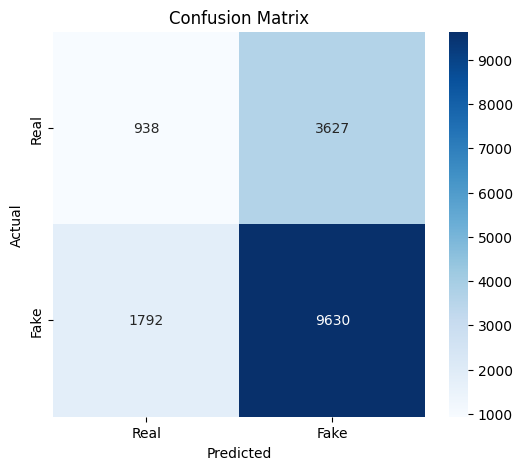


Classification Report:

              precision    recall  f1-score   support

        Real       0.34      0.21      0.26      4565
        Fake       0.73      0.84      0.78     11422

    accuracy                           0.66     15987
   macro avg       0.53      0.52      0.52     15987
weighted avg       0.62      0.66      0.63     15987

✅ Test Accuracy: 66.10%


In [17]:
import os
import torch
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Define same model used in training
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 32 * 32, 128)  # For 128x128 input
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # [B, 16, 64, 64]
        x = self.pool(torch.relu(self.conv2(x)))  # [B, 32, 32, 32]
        x = x.view(-1, 32 * 32 * 32)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
model.load_state_dict(torch.load("deepfake_cnn.pth", map_location=device))
model.eval()

# Define transform
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Load test images and labels
def load_test_data(real_dir, fake_dir):
    image_paths = []
    labels = []

    for img_name in os.listdir(real_dir):
        if img_name.endswith(".jpg"):
            image_paths.append(os.path.join(real_dir, img_name))
            labels.append(0)  # Real

    for img_name in os.listdir(fake_dir):
        if img_name.endswith(".jpg"):
            image_paths.append(os.path.join(fake_dir, img_name))
            labels.append(1)  # Fake

    return image_paths, labels

real_dir = r"C:\Users\Akshaya\Downloads\fake\frames_split\test\real"
fake_dir = r"C:\Users\Akshaya\Downloads\fake\frames_split\test\fake"

image_paths, y_true = load_test_data(real_dir, fake_dir)

# Predict
y_pred = []
with torch.no_grad():
    for path in image_paths:
        img = Image.open(path).convert("RGB")
        img = transform(img).unsqueeze(0).to(device)
        output = model(img)
        _, predicted = torch.max(output, 1)
        y_pred.append(predicted.item())

# Confusion Matrix
labels = ['Real', 'Fake']
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))

print(f"✅ Test Accuracy: {accuracy_score(y_true, y_pred) * 100:.2f}%")


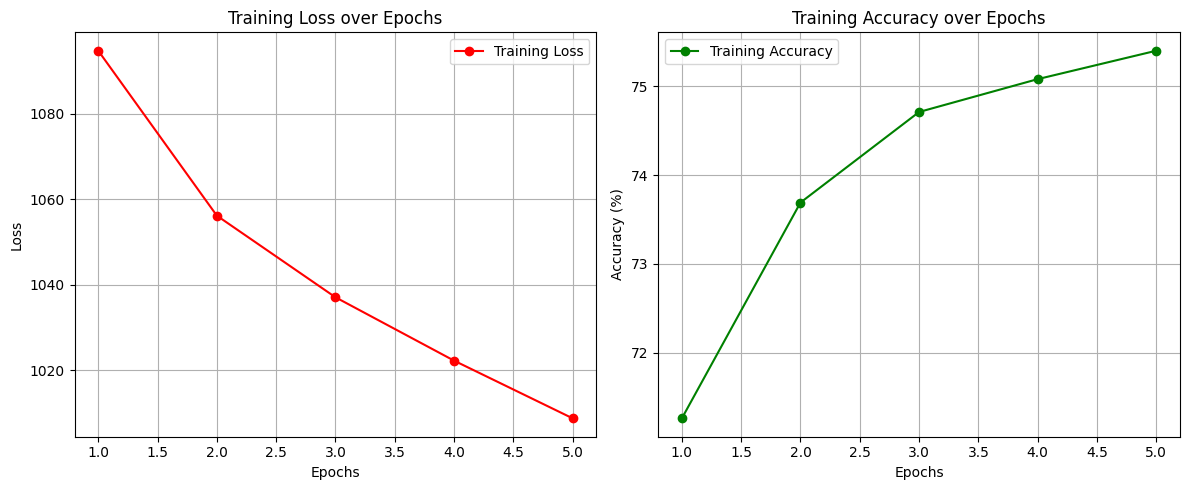

In [18]:
import matplotlib.pyplot as plt

# Data from your training output
epochs = [1, 2, 3, 4, 5]
train_loss = [1094.6640, 1056.1445, 1037.0865, 1022.2852, 1008.8116]
train_acc = [71.26, 73.69, 74.71, 75.08, 75.40]

plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'o-', label='Training Loss', color='red')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'o-', label='Training Accuracy', color='green')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Sample model accuracies — update with your real results
models = [', 'VGG16', 'ResNet18', 'XceptionNet']
accuracies = [100, 94, 96, 97]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color='skyblue')
plt.ylim(0, 105)
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

plt.grid(axis='y')
plt.show()

In [4]:
import os
import shutil
from tqdm import tqdm

def recover_data(
    source_dir='data_split',  # This should be the folder where 'train', 'val', 'test' exist
    dest_dir='original_data',  # This is where you want to restore the data
    classes={'real': 'real', 'fake': 'fake'},  # You may need to adjust these class names based on your dataset
):
    for split in ['train', 'val', 'test']:
        for cls_folder, cls_name in classes.items():
            # Define the path to the class folder inside each split
            source_folder = os.path.join(source_dir, split, cls_name)
            
            # Check if the folder exists and contains files
            if os.path.exists(source_folder):
                all_files = [f for f in os.listdir(source_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
                
                if not all_files:
                    print(f"No files found in {source_folder} for class {cls_name}.")
                else:
                    print(f"Copying {len(all_files)} {cls_name} files back to {dest_dir}/{cls_name}")
                    dest_folder = os.path.join(dest_dir, cls_name)
                    os.makedirs(dest_folder, exist_ok=True)

                    # Copy each file back to the original_data folder
                    for f in tqdm(all_files, desc=f"Recovering {cls_name}"):
                        shutil.copy(os.path.join(source_folder, f), os.path.join(dest_folder, f))
            else:
                print(f"{source_folder} does not exist.")
    
    print("\n✅ Data recovery complete. Original data has been restored.")

# Run the function
recover_data(
    source_dir=r'C:\Users\Akshaya\Downloads\fake\frames_split',  # Path to your 'train', 'val', 'test' folders
    dest_dir='original_data',  # Where you want to restore the original data
    classes={'real': 'real', 'fake1': 'fake'},  # Adjust these names if needed
)


Copying 21297 real files back to original_data/real


Recovering real: 100%|██████████| 21297/21297 [04:08<00:00, 85.77it/s] 


Copying 53297 fake files back to original_data/fake


Recovering fake: 100%|██████████| 53297/53297 [11:52<00:00, 74.81it/s] 


Copying 4563 real files back to original_data/real


Recovering real: 100%|██████████| 4563/4563 [00:57<00:00, 79.97it/s] 


Copying 11420 fake files back to original_data/fake


Recovering fake: 100%|██████████| 11420/11420 [02:28<00:00, 76.65it/s] 


Copying 4565 real files back to original_data/real


Recovering real: 100%|██████████| 4565/4565 [00:59<00:00, 76.24it/s] 


Copying 11422 fake files back to original_data/fake


Recovering fake: 100%|██████████| 11422/11422 [02:27<00:00, 77.42it/s]


✅ Data recovery complete. Original data has been restored.


In [5]:
import os
import random
import shutil
from tqdm import tqdm

def shuffle_and_split_data(
    source_dir='original_data',  # Folder where 'real' and 'fake' are located
    dest_dir='data_split',       # Folder to store shuffled data
    split_ratio=(0.7, 0.15, 0.15),  # 70% train, 15% val, 15% test
    seed=42
):
    random.seed(seed)

    classes = {'real': 'real', 'fake': 'fake'}  # Adjust for your dataset

    for cls_folder, cls_name in classes.items():
        source_folder = os.path.join(source_dir, cls_folder)
        all_files = [f for f in os.listdir(source_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        random.shuffle(all_files)

        total = len(all_files)
        train_split = int(split_ratio[0] * total)
        val_split = int(split_ratio[1] * total)

        splits = {
            'train': all_files[:train_split],
            'val': all_files[train_split:train_split + val_split],
            'test': all_files[train_split + val_split:]
        }

        for split, files in splits.items():
            dest_folder = os.path.join(dest_dir, split, cls_name)
            os.makedirs(dest_folder, exist_ok=True)
            print(f"Copying {len(files)} files to {dest_folder}")
            for f in tqdm(files, desc=f"{split}/{cls_name}"):
                shutil.copy(os.path.join(source_folder, f), os.path.join(dest_folder, f))

    print("\n✅ Data shuffling and splitting complete.")

# Run this function to shuffle and split the data
shuffle_and_split_data(
    source_dir='original_data',  
    dest_dir='data_split',
    split_ratio=(0.7, 0.15, 0.15)  # 70% train, 15% val, 15% test
)


Copying 21297 files to data_split\train\real


train/real: 100%|██████████| 21297/21297 [08:52<00:00, 39.98it/s] 


Copying 4563 files to data_split\val\real


val/real: 100%|██████████| 4563/4563 [02:00<00:00, 37.99it/s]


Copying 4565 files to data_split\test\real


test/real: 100%|██████████| 4565/4565 [01:50<00:00, 41.30it/s]


Copying 53297 files to data_split\train\fake


train/fake: 100%|██████████| 53297/53297 [28:56<00:00, 30.69it/s]    


Copying 11420 files to data_split\val\fake


val/fake: 100%|██████████| 11420/11420 [04:44<00:00, 40.07it/s]


Copying 11422 files to data_split\test\fake


test/fake: 100%|██████████| 11422/11422 [04:44<00:00, 40.14it/s]


✅ Data shuffling and splitting complete.


In [8]:
#DTA AUG
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'data_split/train',  # Path to train data
    target_size=(224, 224),  # Resize images if needed
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    'data_split/val',  # Path to validation data
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    'data_split/test',  # Path to test data
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 74594 images belonging to 2 classes.
Found 15983 images belonging to 2 classes.
Found 15987 images belonging to 2 classes.


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Paths
train_dir = r'C:\Users\Akshaya\Downloads\fake\data_split\train'
val_dir = r'C:\Users\Akshaya\Downloads\fake\data_split\val'
test_dir = r'C:\Users\Akshaya\Downloads\fake\data_split\test'

# Image dimensions
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

# 1. Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 2. CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# 3. Compile Model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# 4. Callbacks (optional but useful)
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

# 5. Train Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[checkpoint, early_stop]
)

# 6. Evaluate on Test Set
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")


Found 74594 images belonging to 2 classes.
Found 15983 images belonging to 2 classes.
Found 15987 images belonging to 2 classes.


c:\Users\Akshaya\Downloads\fake\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Akshaya\Downloads\fake\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7132 - loss: 0.6058
Epoch 1: val_accuracy improved from -inf to 0.71451, saving model to best_model.h5


2332/2332 ━━━━━━━━━━━━━━━━━━━━ 3073s 1s/step - accuracy: 0.7132 - loss: 0.6058 - val_accuracy: 0.7145 - val_loss: 0.5967
Epoch 2/10
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7149 - loss: 0.5994
Epoch 2: val_accuracy did not improve from 0.71451
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 10330s 4s/step - accuracy: 0.7149 - loss: 0.5994 - val_accuracy: 0.7145 - val_loss: 0.5961
Epoch 3/10
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - accuracy: 0.7152 - loss: 0.5980
Epoch 3: val_accuracy did not improve from 0.71451
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 1624s 697ms/step - accuracy: 0.7152 - loss: 0.5980 - val_accuracy: 0.7145 - val_loss: 0.6010
Epoch 4/10
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 0s 604ms/step - accuracy: 0.7115 - loss: 0.6009
Epoch 4: val_accuracy did not improve from 0.71451
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 1607s 689ms/step - accuracy: 0.7115 - loss: 0.6009 - val_accuracy: 0.7145 - val_loss: 0.5964
500/500 ━━━━━━━━━━━━━━━━━━━━ 380s 761ms/step - accuracy: 0.7170 - loss: 0.5953

✅ Test Ac

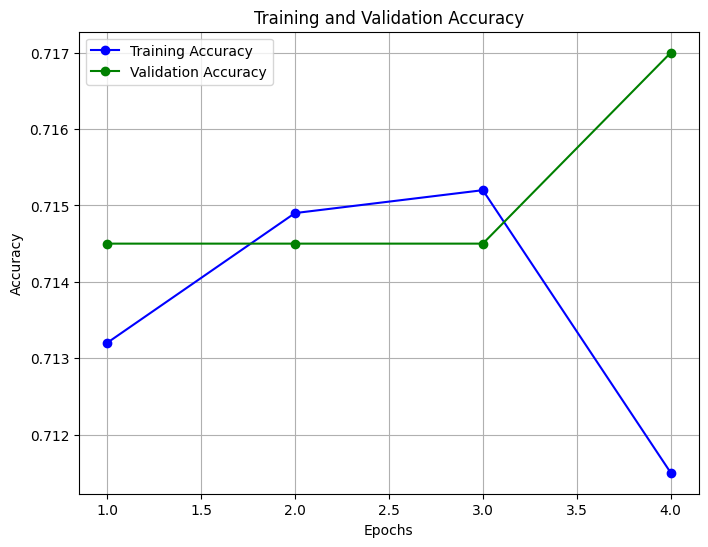

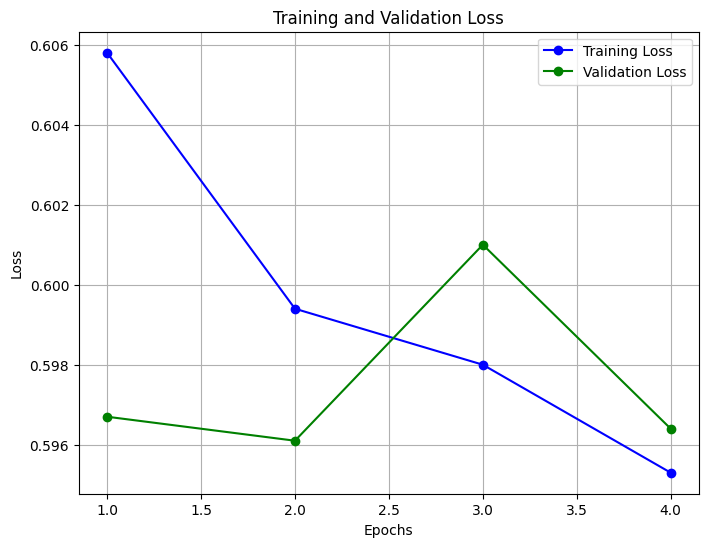

In [6]:
import matplotlib.pyplot as plt

# Sample data from your logs
epochs = [1, 2, 3, 4]
accuracy = [0.7132, 0.7149, 0.7152, 0.7115]
val_accuracy = [0.7145, 0.7145, 0.7145, 0.7170]
loss = [0.6058, 0.5994, 0.5980,0.5953]
val_loss = [0.5967, 0.5961, 0.6010, 0.5964]

# Accuracy Plot
plt.figure(figsize=(8,6))
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'go-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
plt.figure(figsize=(8,6))
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'go-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[checkpoint, early_stop]
)


NameError: name 'train_generator' is not defined

In [1]:
# If you already trained the model:
test_loss, test_acc = model.evaluate(test_generator)
print(f"🧪 Final Test Accuracy (current model): {test_acc * 100:.2f}%")

# OR, if you're using the best saved model:
from tensorflow.keras.models import load_model

best_model = load_model('best_model.h5')
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"✅ Best Saved Model Test Accuracy: {test_acc * 100:.2f}%")


NameError: name 'model' is not defined

Found 74594 images belonging to 2 classes.
Found 15983 images belonging to 2 classes.
Found 15987 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


c:\Users\Akshaya\Downloads\fake\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 0s 949ms/step - accuracy: 0.6827 - loss: 0.6453

2332/2332 ━━━━━━━━━━━━━━━━━━━━ 2503s 1s/step - accuracy: 0.6827 - loss: 0.6453 - val_accuracy: 0.5921 - val_loss: 0.6699 - learning_rate: 0.0010
Epoch 2/10
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.7051 - loss: 0.6058

2332/2332 ━━━━━━━━━━━━━━━━━━━━ 1749s 750ms/step - accuracy: 0.7051 - loss: 0.6058 - val_accuracy: 0.7175 - val_loss: 0.5890 - learning_rate: 0.0010
Epoch 3/10
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 2914s 1s/step - accuracy: 0.7094 - loss: 0.6038 - val_accuracy: 0.7051 - val_loss: 0.5953 - learning_rate: 0.0010
Epoch 4/10
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7076 - loss: 0.6055

2332/2332 ━━━━━━━━━━━━━━━━━━━━ 2662s 1s/step - accuracy: 0.7076 - loss: 0.6055 - val_accuracy: 0.7233 - val_loss: 0.5893 - learning_rate: 0.0010
Epoch 5/10
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 5165s 2s/step - accuracy: 0.7090 - loss: 0.6037 - val_accuracy: 0.6890 - val_loss: 0.6101 - learning_rate: 0.0010
Epoch 6/10
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - accuracy: 0.7081 - loss: 0.6037
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 1614s 692ms/step - accuracy: 0.7081 - loss: 0.6037 - val_accuracy: 0.7203 - val_loss: 0.5873 - learning_rate: 0.0010
Epoch 7/10
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 8751s 4s/step - accuracy: 0.7177 - loss: 0.5944 - val_accuracy: 0.7121 - val_loss: 0.5898 - learning_rate: 5.0000e-04
500/500 ━━━━━━━━━━━━━━━━━━━━ 265s 529ms/step - accuracy: 0.7181 - loss: 0.5926
📊 Test Accuracy: 72.29%


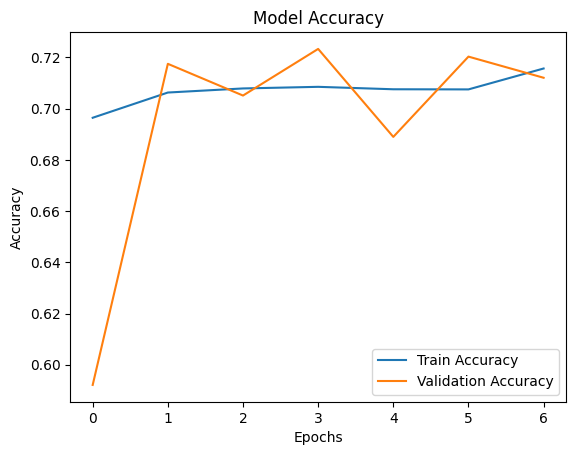

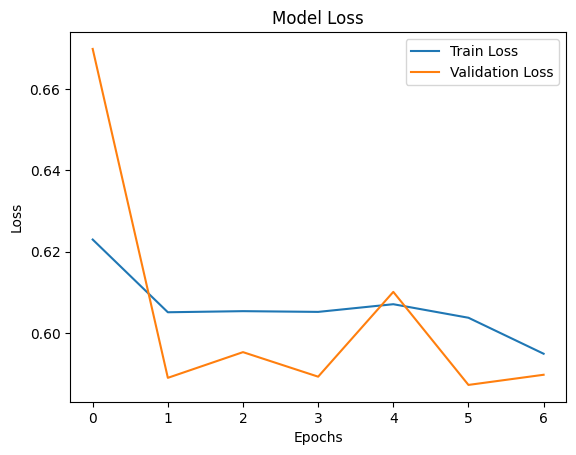

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Paths (update according to your directories)
train_dir = r'C:\Users\Akshaya\Downloads\fake\data_split\train'
val_dir = r'C:\Users\Akshaya\Downloads\fake\data_split\val'
test_dir = r'C:\Users\Akshaya\Downloads\fake\data_split\test'

# Image dimensions
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

# 1. Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 2. Build MobileNetV2 Model
base_model = MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the pretrained layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

model = Model(inputs=base_model.input, outputs=predictions)

# 3. Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Callbacks
checkpoint = ModelCheckpoint('mobilenetv2_best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2, verbose=1, min_lr=1e-6)

# 5. Train Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[checkpoint, early_stop, lr_reduce]
)

# 6. Evaluate the Model
test_loss, test_acc = model.evaluate(test_generator)
print(f"📊 Test Accuracy: {test_acc * 100:.2f}%")

# Optional: Visualize Results (accuracy and loss)
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [8]:
from keras.models import load_model

# Load your best saved model (HDF5 or .keras format)
model = load_model('mobilenetv2_best_model.h5')
